# Current induced domain wall motion

In this tutorial we show how spin transfer torque (STT) can be included in micromagnetic simulations. To illustrate that, we will try to move the domain wall using spin-polarised current.

Let us simulate a one-dimensional array of magnetic moments with lenth $L = 200 \,\text{nm}$ and discretisation cell $(2 \,\text{nm}, 2 \,\text{nm}, 2 \,\text{nm})$.

2017/3/30 13:13: Calling OOMMF (domain_wall/domain_wall.mif) ... [0.5s]


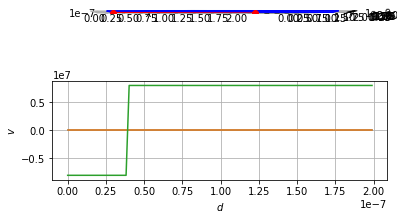

In [1]:
import oommfc as oc
import discretisedfield as df
%matplotlib inline

L = 200e-9  # sample length (m)
w = 10e-9  # sample width (m)
d = 2e-9  # discretisation cell size (m)
Ms = 8e6  # saturation magnetisation (A/m)
A = 1e-11  # exchange energy constant (J/m)
K = 5e6  # uniaxial anisotropy constant (J/m**3)
u = (0, 0, 1)  # easy axis
gamma = 2.211e5  # gyromagnetic ratio (m/As)
alpha = 0.5  # Gilbert damping

mesh = oc.Mesh(p1=(0, 0, 0), p2=(L, d, d), cell=(d, d, d))

system = oc.System(name="domain_wall")
system.hamiltonian = oc.Exchange(A=A) + oc.UniaxialAnisotropy(K=K, u=u) + oc.Demag()
system.dynamics = oc.Precession(gamma=gamma) + oc.Damping(alpha=alpha)

def m_value(pos):
    x, y, z = pos
    if x < 40e-9:
        return (0, 0, -1)
    else:
        return (0, 0, 1)
    
system.m = df.Field(mesh, value=m_value, norm=Ms)

md = oc.MinDriver()
md.drive(system)

system.m.plot_line_intersection(p1=(0, 0, 0), p2=(199e-9, 0, 0))

Now we can add the STT term to the dynamics equation.

2017/3/30 13:13: Calling OOMMF (domain_wall/domain_wall.mif) ... [0.6s]


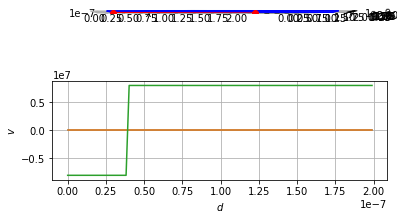

In [2]:
system.dynamics += oc.STT(u=(800000, 0, 0), beta=0.5)

td = oc.TimeDriver()
td.drive(system, t=0.1e-9, n=1)

system.m.plot_line_intersection(p1=(0, 0, 0), p2=(199e-9, 0, 0))